# Introducing Scikit-Learn
## Data Representation in Scikit-Learn
#### Data as table

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Each row corresponds to a different iris sample, which we will call **`n_samples`**. Each column corresponds to a different measured feature of each sample, so we will call the columns **`n_features`**.

#### Target Array

The *target array* is usually the quantity or label we want to predict from the data. Statistically speaking, it is known as the *dependent variable*. In the Iris dataset, the *target array* is the **`species`** column.

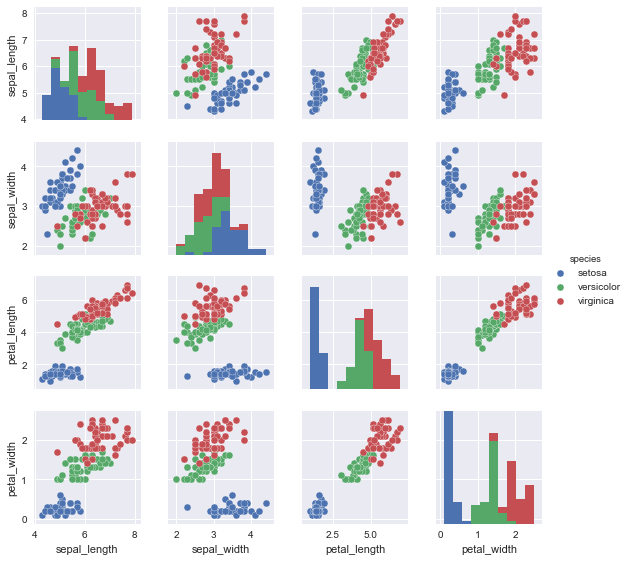

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=2);

In [4]:
# to use in scikit-learn, we will extract features matrix & target array
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

#### Now to introduce Scikit-Learn

**Common Scikit-Learn Steps to Make a Prediction**

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange the data into a features matrix and target vector.
4. Fit the model to the data by calling the **`fit()`** method of the model instance.
5. Apply the model to new data using **`predict()`** for supervised learning problems, and either **`transform()`** or **`predict()`** for unsupervised learning problems.

#### Supervised learning example: Simple linear regression

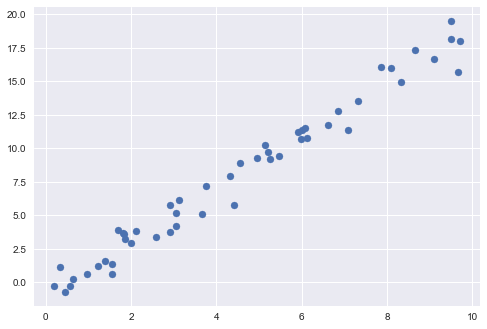

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# create random data
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [9]:
# 1. Choose class of model
from sklearn.linear_model import LinearRegression

In [10]:
# 2. Choose model hyperparameters.
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# 3. Arrange data into a features matrix and target vector
X = x[:, np.newaxis] # create one column
X.shape

(50, 1)

In [17]:
# 4. Fit the model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# what is the slope and y-intercept of the fit model?
model.coef_

array([ 1.9776566])

In [19]:
model.intercept_

-0.90331072553111635

In [26]:
# 5. Predict labels for unknown data
xfit = np.linspace(-1, 11) # generate new data
xfit.shape

(50,)

In [27]:
# make xfit into a column
Xfit = xfit[:, np.newaxis]

# set y to the column to make preditions
yfit = model.predict(Xfit)

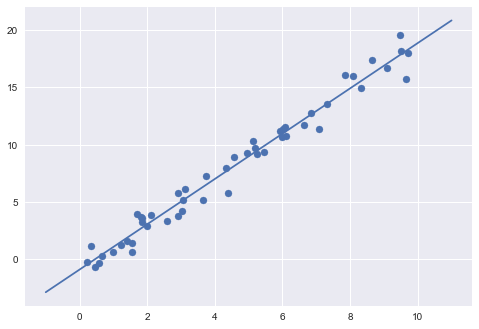

In [28]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

#### Supervised learning example: Iris classification

We will use the Gaussian Naive Bayes model for this task. Because it is so fast and has no hyperparameters to choose, Gaussian Naive Bayes is often a good model to use as a baseline classification, before you explore more sophisticated models.

In [29]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
# 1. Choose model class
from sklearn.naive_bayes import GaussianNB 

# 2. Instantiate model
model = GaussianNB()

# 3. Fit model to data
model.fit(Xtrain, ytrain)

# 4. Predict on new data
y_model = model.predict(Xtest)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

#### Unsupervised learning example: Iris dimensionality
The Iris dataset is four dimensional, so we will try and reduce it so it can be more easily visualized. The goal of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. To do this, we will use *Pricipal Component Analysis (PCA)*.

In [32]:
# 1 choose the model class
from sklearn.decomposition import PCA

# 2. Instantiate the model with hyperparameters
model = PCA(n_components=2)

# 3. Fit to data. Notice y is not specified.
model.fit(X_iris)

# 4. Transform the data to two dimensions
X_2D = model.transform(X_iris)

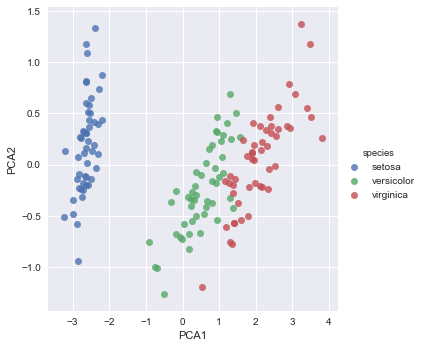

In [33]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

Nice! Pretty solid separation. I will go deeper into detail about how PCA actually works in later notebooks.

#### Unsupervised learning: Iris clustering

A clustering algorithm attempts to find distinct groups of data without reference to any labels. To do this we will use *Gaussian mixture model (GMM)*.

In [36]:
# 1 choose the model class
from sklearn.mixture import GaussianMixture

# 2. Instantiate the model with hyperparameters
model = GaussianMixture(n_components=3, covariance_type='full')

# 3. Fit to data. Notice y is not specified.
model.fit(X_iris)

# 4. Determine the cluster labels
y_gmm = model.predict(X_iris)

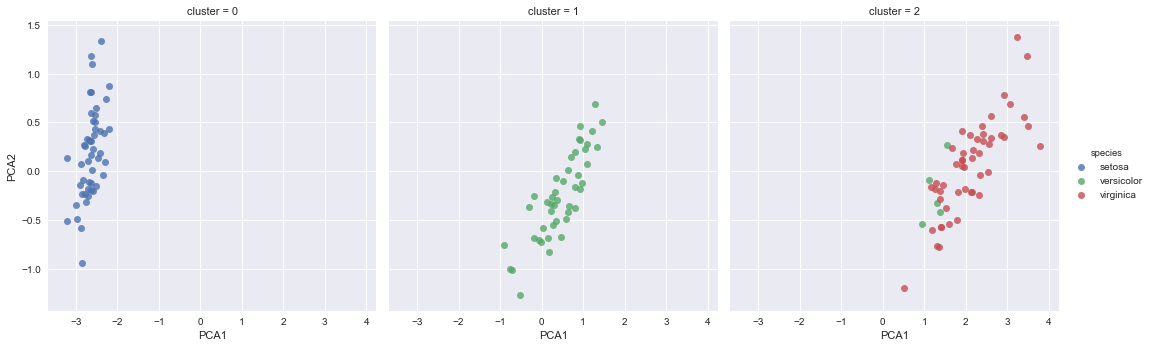

In [37]:
# add cluster label to Iris DataFrame
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

## Application: Exploring Handwritten Digits
#### Loading and visualizing the digits data

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

We have 1797 samples of 8x8 pixel images of handwritten digits to analyze.

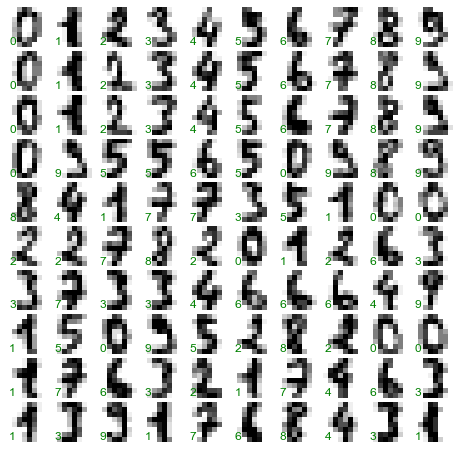

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

To work with this data in Scikit-Learn, we need to convert the images into a two-dimensional `[n_samples, n_features]` representation. We can do this by treating each pixel in the image (8x8 = 64 pixels per image) as a feature. In addition, we need the target array which gives the actual number written.

In [40]:
X = digits.data
X.shape

(1797, 64)

In [41]:
y = digits.target
y.shape

(1797,)

#### Unsupervised learning: Dimensionality reduction
It's difficult to visualize something in 64-dimensions, so let's try to reduce it down to two dimensions using a manifold learning algorithm called *Isomap*.

In [42]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We now have two dimensional data! Let's plot it to see if we can learn anything from its structure.

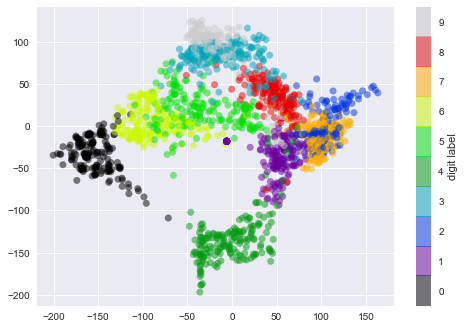

In [46]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Interesting... this gives us some good intuition into how well the numbers are separated. Notice the 0s (black) and 1s (purple) have very little overlap, while 8s (red) and 3s (light blue) have a significant amount of overlap. This intuitively makes sense: 0s and 1s have very different shapes and 8s and 3s are quite similar in shape. Overall, the different groups appear to be fairly well separated indicating a straightforward supervised classification algorithm should perform well on this data. Let's try.

#### Classification on digits

In [47]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [48]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [49]:
# view model accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy_score(ytest, y_model)

0.83333333333333337

Nice. We are 83.3% accurate at predicting the number, but let's dial our analysis in a little and see exactly where we went wrong.

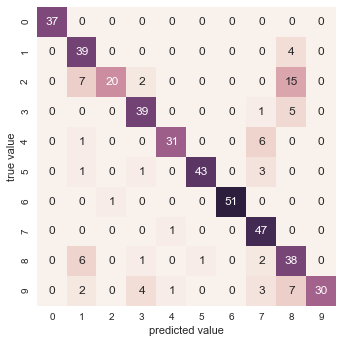

In [53]:
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

It appears a large number of 2s are classified as 1s and 8s. Let's take another look at the digits.

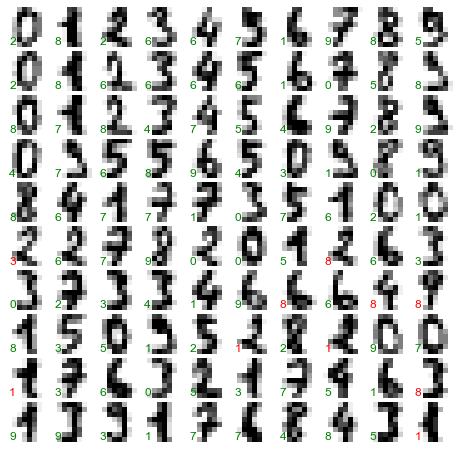

In [54]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

To improve upon our 83%, we might move to a more sophisticated algorithm, such as support vector machines or random forests.